In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('world_happiness_report_2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


## Задание 1: Анализ корреляции между ВВП на душу населения и оценкой счастья.
Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.

In [18]:
import scipy.stats as stats
# Вычисляем коэффициент корреляции Пирсона
correlation_coefficient, p_value = stats.pearsonr(df['GDP per capita'], df['Score'])

print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Пирсона: 0.7938828678781276
P-значение: 4.315480913319443e-35


###Визуализация корреляции

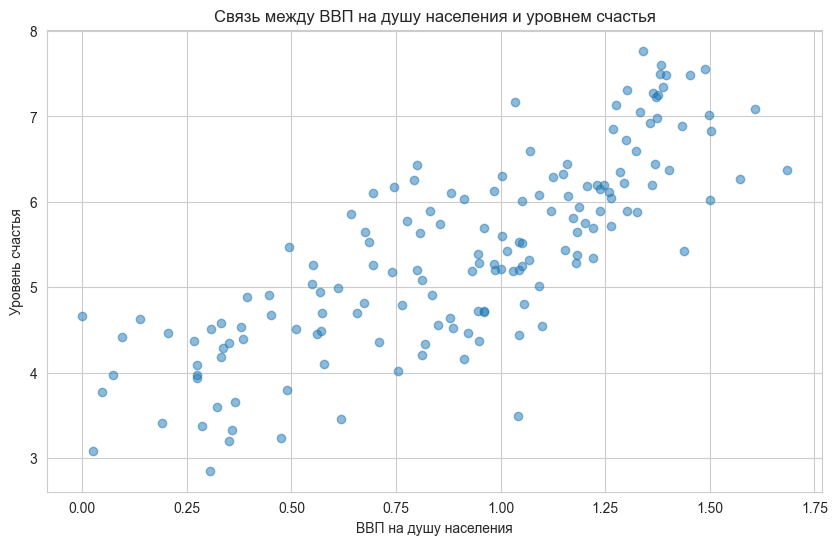

In [19]:
import matplotlib.pyplot as plt

# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(df['GDP per capita'], df['Score'], alpha=0.5)
plt.title('Связь между ВВП на душу населения и уровнем счастья')
plt.xlabel('ВВП на душу населения')
plt.ylabel('Уровень счастья')
plt.grid(True)
plt.show()

Коэффициент корреляции Пирсона равен 0.7938828678781276, и это означает, что между ВВП на душу населения и уровнем счастья есть сильная положительная связь.

P-значение близко к 0 (4.315480913319443e-35), что говорит о статистической значимости результатов. Поскольку это значение меньше стандартного порога в 0.05 для статистической значимости, мы можем сказать, что существует статистически значимая корреляция между ВВП на душу населения и уровнем счастья.

Исходя из полученных данных, мы можем сделать вывод, что ВВП на душу населения и уровень счастья связаны, и эта связь является сильной. 

## Задание 2: Исследование влияния социальной поддержки на оценку счастья.
Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.

In [20]:
from scipy.stats import spearmanr

# Вычисляем коэффициент корреляции Спирмана
coef, p = spearmanr(df['Social support'], df['Score'])
print(f"Коэффициент корреляции Спирмена между уровнем социальной поддержки и оценкой счастья: {coef}, P-value: {p}")


Коэффициент корреляции Спирмена между уровнем социальной поддержки и оценкой счастья: 0.8161807357057258, P-value: 1.613098226311642e-38


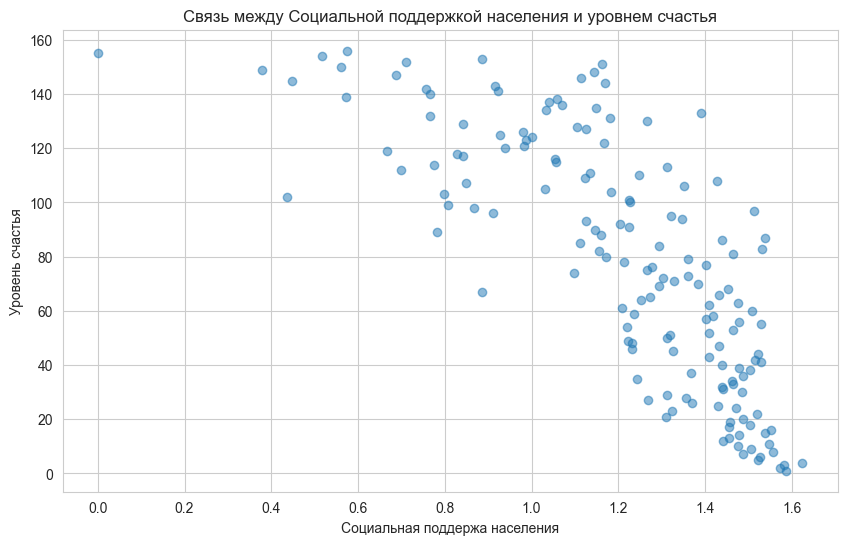

In [12]:
# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(df['Social support'], df['Overall rank'], alpha=0.5)
plt.title('Связь между Социальной поддержкой населения и уровнем счастья')
plt.xlabel('Социальная поддержа населения')
plt.ylabel('Уровень счастья')
plt.grid(True)
plt.show()

Коэффициент корреляции Спирмана равен 0.8161807357057258, и это означает, что между уровнем социальной поддержки наслеения и уровнем счастья есть сильная положительная связь.

P-значение близко к 0 (1.613098226311642e-38), что говорит о статистической значимости результатов. Поскольку это значение меньше стандартного порога в 0.05 для статистической значимости, мы можем сказать, что существует статистически значимая корреляция между уровнем социальной поддержки наслеения и уровнем счастья.

Исходя из полученных данных, мы можем сделать вывод, что социальная поддержка и уровень счастья связаны, и эта связь является сильной. 

## Задание 3: Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.
Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.

In [21]:
from scipy.stats import kendalltau

# Расчет коэффициента Кэнделла
tau, p_value = kendalltau(df["Healthy life expectancy"], df["Score"])
print(f"Коэффициент корреляции Кэнделла между продолжительностью жизни и уровнем счастья: {tau}, P-value: {p_value}")

Коэффициент корреляции Кэнделла между продолжительностью жизни и уровнем счастья: 0.6026128531700047, P-value: 8.000780684230196e-29


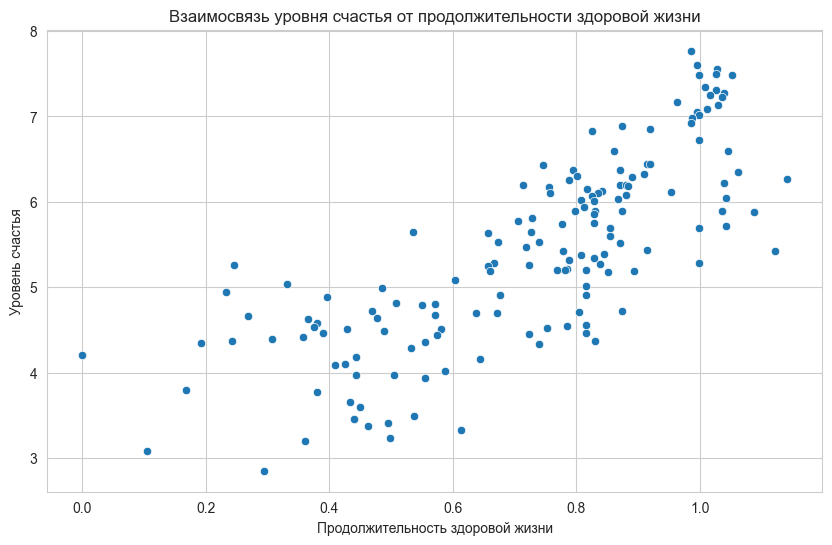

In [23]:
# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Healthy life expectancy'], y=df['Score'])
plt.title('Взаимосвязь уровня счастья от продолжительности здоровой жизни')
plt.xlabel('Продолжительность здоровой жизни')
plt.ylabel('Уровень счастья')
plt.show()

Коэффициент корреляции Кэнделла равен 0.6026128531700047, и это означает, что между продолжительностью здоровой жизни и уровнем счастья есть положительная связь.

P-значение близко к 0 (8.000780684230196e-29), что говорит о статистической значимости результатов. Поскольку это значение меньше стандартного порога в 0.05 для статистической значимости, мы можем сказать, что существует статистически значимая корреляция между продолжительностью здоровой жизни и уровнем счастья.

Исходя из полученных данных, мы можем сделать вывод, что продолжительность здоровой жизни и уровень счастья связаны. 

## Задание 4: Свобода делать жизненный выбор и уровень счастья.
Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

In [24]:
import scipy.stats as stats
# Вычисляем коэффициент корреляции Пирсона
correlation_coefficient, p_value = stats.pearsonr(df['Freedom to make life choices'], df['Score'])

print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Пирсона: 0.5667418257199901
P-значение: 1.2379243627982178e-14


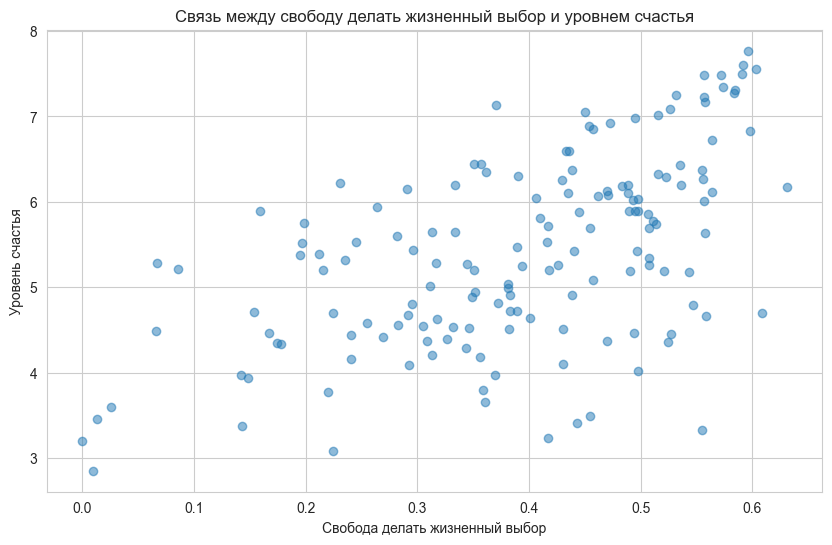

In [25]:
import matplotlib.pyplot as plt

# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(df['Freedom to make life choices'], df['Score'], alpha=0.5)
plt.title('Связь между свободу делать жизненный выбор и уровнем счастья')
plt.xlabel('Свобода делать жизненный выбор')
plt.ylabel('Уровень счастья')
plt.grid(True)
plt.show()

Коэффициент корреляции Пирсона равен 0.5667418257199901, и это означает, что между свободой делать жизненный выбор и уровнем счастья есть положительная связь.

P-значение близко к 0 (1.2379243627982178e-14), что говорит о статистической значимости результатов. Поскольку это значение меньше стандартного порога в 0.05 для статистической значимости, мы можем сказать, что существует статистически значимая корреляция между свободой делать жизненный выбор и уровнем счастья.

Исходя из полученных данных, мы можем сделать вывод, что свободой делать жизненный выбор и уровень счастья связаны. 

## Вопросы для обсуждения:
Какой из факторов наиболее сильно связан с уровнем счастья в анализируемых странах? В чем может заключаться причина такой взаимосвязи?

Были рассмотрены влияние следующие факторы на уровень счастья:
- ВВП на душу населения, корреляция 0.7938828678781276;
- социальная поддержки, корреляция 0.8161807357057258;
- продолжительность здоровой жизни, корреляция 0.6026128531700047;
- свобода делать жизненный выбор, корреляция 0.5667418257199901

Из полученных результатов, можно увидеть, что ВВП на душу население и социальная поддержка играют большую роль в формирования уровня счастья, чем продолжительность здоровой жизни и свободой делать жизненный выбор. Из этого можно сделать выводы, что на уровень счастья значительно большее влияние имеет экономическое развитие (здоровье) региона. Все факторы показали достаточно сильное влияние на уровень счастья, но экономические показатели и политика направления на поддержку граждан, имеет большее влияние. 